# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob
import time

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

(250, 250, 3)
Number of faces detected: 1


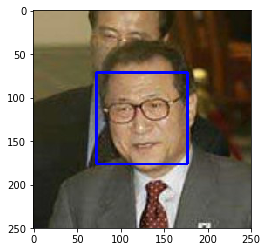

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[np.random.randint(100)])
print(img.shape)
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [9]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
face_in_human_imgs = [1*face_detector(himg) for himg in tqdm(human_files_short)]
face_in_dog_imgs = [1*face_detector(dimg) for dimg in tqdm(dog_files_short)]

100%|██████████| 100/100 [00:29<00:00,  3.35it/s]


In [10]:
print('Human face detected in {:.2%} of first  100 human files'.format(np.sum(face_in_human_imgs)/len(human_files_short)))
print('Human face detected in {:.2%} of first 100 dog files'.format(np.sum(face_in_dog_imgs)/len(dog_files_short)))

Human face detected in 98.00% of first  100 human files
Human face detected in 17.00% of first 100 dog files


<span style="color:purple"><b>Let's check the dog images where human faces are detected. We observe that some images actually have human faces. While others are false detection</b></span>

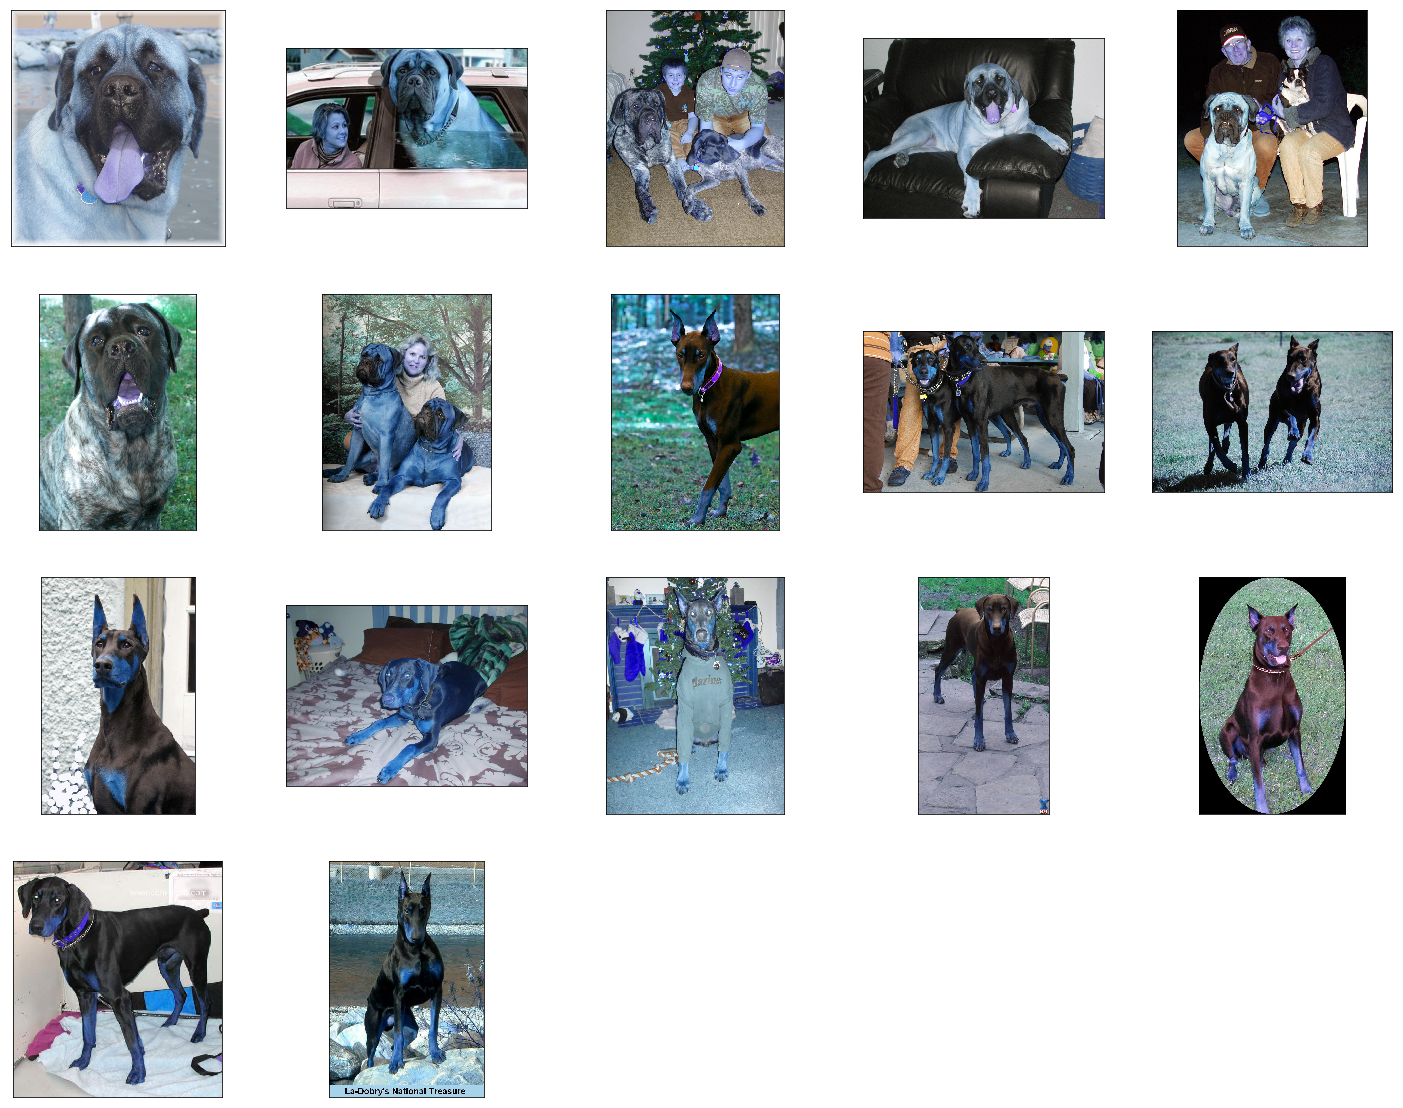

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
img_with_face = np.where(np.array(face_in_dog_imgs) == 1)[0]

i = 0 
fig = plt.figure(figsize=(25, 20))
for idx in img_with_face:
    ax = fig.add_subplot(4, 5, i+1,xticks=[], yticks=[])
    plt.imshow(cv2.imread(dog_files_short[idx]))
    i+=1

<h6>4 out of 17 pictures of dog actually had human faces.
Let's see one example below.</h6>


(330, 495, 3)
Number of faces detected: 1


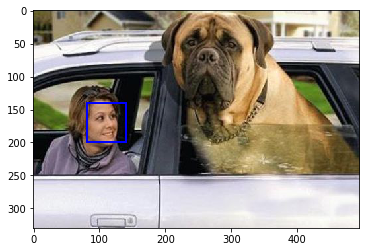

In [8]:
img = cv2.imread(dog_files_short[img_with_face[1]])
print(img.shape)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray)
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [9]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.
# from mtcnn import MTCNN
# import keras
# detector = MTCNN()
# detector.detect_faces(cv_rgb)

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [11]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    #print('Model to GPU')
    VGG16 = VGG16.cuda()

In [12]:
for param in VGG16.features.parameters():
    param.requires_grad = False

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [13]:
from PIL import Image
import torchvision.transforms as transforms
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    tfms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        normalize
    ])
    img = Image.open(img_path)
    img = tfms(img).unsqueeze(0)
    VGG16.eval()
    if use_cuda:
        #print('Data and model to GPU')
        img = img.cuda()
        
    
    output = VGG16(img)
    _, pred = torch.max(output,1)
    pred = np.squeeze(pred.cpu().numpy())
    return  pred # predicted class index

###### Testing Code

In [14]:
img_path = '/data/dog_images/train/001.Affenpinscher/Affenpinscher_00001.jpg'
VGG16_predict(img_path=img_path)

array(252)

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [15]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    pred = VGG16_predict(img_path)
    return True if pred >= 151 and pred <= 268 else False # true/false

In [16]:
dog_detector(img_path)

True

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [17]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dog_in_human_imgs = [1*dog_detector(himg) for himg in tqdm(human_files_short)]
dog_in_dog_imgs = [1*dog_detector(dimg) for dimg in tqdm(dog_files_short)]

100%|██████████| 100/100 [01:22<00:00,  1.24it/s]


In [18]:
print('Dog detected in {:.2%} of first  100 human files'.format(np.sum(dog_in_human_imgs)/len(human_files_short)))
print('Dog detected in {:.2%} of first 100 dog files'.format(np.sum(dog_in_dog_imgs)/len(dog_files_short)))

Dog detected in 0.00% of first  100 human files
Dog detected in 100.00% of first 100 dog files


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [21]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
resnet = models.resnet50(pretrained=True)

for param in resnet.parameters():
    param.requires_grad = False
if use_cuda:
    resnet.cuda()
def resnet_predict(img_path):
    '''
    Use pre-trained resnet model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to Resnet50 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    resnet.eval()
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    tfms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        normalize
    ])
    img = Image.open(img_path)
    img = tfms(img).unsqueeze(0)
    if use_cuda:
        img.cuda()
    output = resnet(img)
    _, pred = torch.max(output,1)
    pred = np.squeeze(pred.numpy())
    return  pred # pred

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:05<00:00, 18282319.73it/s]


In [22]:
resnet_predict(img_path)

array(252)

In [28]:
def dog_detector_resnet(img_path):
    ## TODO: Complete the function.
    pred = resnet_predict(img_path)
    return True if pred >= 151 and pred <= 268 else False # true/false

In [24]:
dog_in_human_imgs = [1*dog_detector_resnet(himg) for himg in tqdm(human_files_short)]
dog_in_dog_imgs = [1*dog_detector_resnet(dimg) for dimg in tqdm(dog_files_short)]
print('Dog detected in {:.2%} of first  100 human files'.format(np.sum(dog_in_human_imgs)/len(human_files_short)))
print('Dog detected in {:.2%} of first 100 dog files'.format(np.sum(dog_in_dog_imgs)/len(dog_files_short)))

100%|██████████| 100/100 [00:32<00:00,  3.23it/s]

Dog detected in 0.00% of first  100 human files
Dog detected in 100.00% of first 100 dog files


#### _Output for both models (VGG16 and ResNet50) are giving similar results_

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [17]:
import os
import torch
from torchvision import datasets
from pathlib import Path
from PIL import Image
import torchvision.transforms as transforms
from tqdm import tqdm 
# check if CUDA is available
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

use_cuda = torch.cuda.is_available()

In [18]:
root = Path('/data/dog_images')
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

## task list
# Data loader for train, val and test

batch_size = 32 #Experiment with 64

#Normalize as per imagenet standards
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
train_path, valid_path, test_path = root / 'train', root/'valid', root / 'test'

tfms = {
    'train' : transforms.Compose([
    transforms.RandomResizedCrop(255), #Resize the variable size images
    transforms.RandomRotation(30), #Simulate multiple postures
    transforms.RandomHorizontalFlip(), #Augmentation
    transforms.CenterCrop(224), #Imagenet size
    transforms.ColorJitter(), #Simulate light conditions
    transforms.ToTensor(),
    normalize
    ]),
    'valid' : transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize
    ]),
    'test' : transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize
    ])
}

train_dataset = datasets.ImageFolder(train_path, transform=tfms['train'])
valid_dataset = datasets.ImageFolder(valid_path, transform=tfms['valid'])
test_dataset = datasets.ImageFolder(test_path, transform=tfms['test'])

loaders_scratch = {
    'train' : torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True),
    'valid' : torch.utils.data.DataLoader(valid_dataset,batch_size=batch_size,shuffle=True),
    'test' : torch.utils.data.DataLoader(test_dataset,batch_size=batch_size,shuffle=True)
}


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
The images in the dog images are variable size and it is necessary to bring them to a standard image. Refering to pytorch trained model zoo. Each model expect atleat 224 image size. Hence, cropping images to 224 x 224 helps in handling the images
Following resizing options are used:
* CenterCrop : Center crop will give high probablity of dog face. Although, it can't be certainty
* RandomCrop : Randomly croping to 224

#### The transforms used are as below: 
* Random horizontal flip : It will give us two perspective the dog and simulate two postures
* Color Jitter: The model must learn to identify key facial features and color may not be releable learning parameter. Some dog breeds are very similar in color. Same dog breed (Labrador) may have different color. Image color may depend on the light conditions. Color jitter will simulate these conditions
* Random Rotation:  As seen in sample images the dogs face angle may vary depending on his posture
* Random Crop to 224 : To match 224 size requirement for trained models and make the comparision possible 
* Resize : To meet imagenet standard
* Normalize : To meet imagenet standard


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [19]:
# Import necessary modules
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [20]:
# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1) # See 224x224x3 tensor 
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1) # See 112x112x64 tensor
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1) # See 56x56x128 tensor
        self.conv4 = nn.Conv2d(256, 512, 3, padding=1) # See 28x28x256 tensor
        
        self.pool = nn.MaxPool2d(2,2)
        self.bn1 = nn.BatchNorm2d(64)
        self.bn2 = nn.BatchNorm2d(128)
        self.bn3 = nn.BatchNorm2d(256)
        
        self.fc1 = nn.Linear(512*14*14, 2048)
        self.fc2= nn.Linear(2048, 1024)
        self.fc3 = nn.Linear(1024, 512)
        self.fc4 = nn.Linear(512 , 133)
        
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.bn1(x)
        
        x = self.pool(F.relu(self.conv2(x)))
        x = self.bn2(x)
        
        x = self.pool(F.relu(self.conv3(x)))
        x = self.bn3(x)
        
        x = self.pool(F.relu(self.conv4(x)))
        
        x = x.view(-1, 512*14*14)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = self.fc4(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
print(model_scratch)

Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=100352, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

The model architecture is as follows:

*```CONV >> RELU >> POOL``` is a BASIC UNIT* for building the Net.<br/>The arch used is based on the learnings from the course itself where initial few layers would be conv followed by fully connected layers to make predictions.<br/> The dog breed classification is a fine grained classification task where the classes are very similar to each other unlike cat-vs-dog. Therefore, it was implied that the arch must be able to capture fine feature differences. Hence, it must be deeper. However, consecutive __MaxPool__ layers will reduce the HxW of the images and larger networks become hard to train.<br/>
The approach started with two basic units ```(conv+relu+pool+batchnorm)``` and two fully connected layer. The optimizer used was *Adam* with *lr = 0.03*. Training and Validation loss were observed for 15 epochs. Both losses declined for first 3 epochs and changed randomly after that with least observed at 3rd epoch. Learning rate was reduced but the loss plateaued with first 10 epochs. Therefore one layer of conv unit and fc added at begining and end of network.</br>Similar steps were repeated by adding one more layer of conv+fc. Another change made was in optimizer. Adam was replaced with SGD after researching on the discussion forums. It was noticed that SGD was working better than Adam for most people. With a begining lr = 0.005, the Net was training fine and loss was steadily declining for training and validation. The experiment was stopped after test accuracy of __23%__ (>10%) reached.<br/><br/>

|Item |Values|
|-----|------|
|Training Epochs| 55|
|Training Loss| 3.25|
|Validation Loss| 3.07
|Test Loss| 3.10|
|Test Accutacy| 23% (197/836)|


#### __Final Architecture__

__```UNIT1 >> BATCHNORM >> UNIT2 >> BATCHNORM >> UNIT3 >> BATCHNORM >> UNIT4 >> FC1 >> DROPOUT >> FC2 >> DROPOUT >> FC4 >> SOFTMAX```__

#### Following blocks were used:
1. BatchNorm (BN) : BN reduces covriance shift. It preven gradient explosion so higher learning rates can be used. Overfitting is also avoided.<br/>
2. Dropout: Prevent overfitting<br/>
3. Maxpool : Dimentionality reductions<br/>
4. 224x224 images: Input images are of variable size. The images are cropped to 224 to follow most trained models for imagenet to ensure likewise comparision
4. 3x3 Kernels: The volume formula (W-F+2P)/S +1 mandates the kernel to be odd numbers. Kernels beyond 5x5 are very rare and 1x1 are for dimensionality reductions. 3x3 kernels are most widely used.
5. Padding of 1: To prevent volumen loss 
6. Stride of 1: Most commonly used.

#### Further steps
* Use learning rate scheduler with Adam <br/>
* Use more layers <br/>
* Experiment with kernel sizes<br/>

#### References:
1. [How Batchnorm works](https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c)
2. [CS231n Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/convolutional-networks/)
3. [Five powerful CNN archietecture](https://medium.com/datadriveninvestor/five-powerful-cnn-architectures-b939c9ddd57b)
4. [CNN Case Studies](http://cs231n.github.io/convolutional-networks/#case)
5. [A Gentle Introduction to 1×1 Convolutions to Manage Model Complexity](https://machinelearningmastery.com/introduction-to-1x1-convolutions-to-reduce-the-complexity-of-convolutional-neural-networks/)
6. [Pytorch Documentation : How to adjust Learning Rate](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)

### Please note:
*1. Please execute the project notebook in GPU enabled environment.*<br/>
*2. Training steps only shows last few epochs as model was trained succesive over incremental steps of 10- 25 epochs at a time. This is done to save on GPU time and change learning rate when the improvement is not visible*<br/>
*3. Model_Scratch is still improving but with lower loss decline.*

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [21]:
n_epochs = 2 #Using epochs in batches of 10 
### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.005)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [22]:
train_loss_hist, valid_loss_hist = [], []
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    #Use valid_loss_min = 3.169465 to resume training model_scratch
    #Use valid_loss_min = np.Inf to train fresh model
    #Use valid_loss_min = xx to resume training model_transfer
    valid_loss_min = 3.169465 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            print('Training batch {}'.format(batch_idx), end = '\r', flush=True)
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            #train_loss_hist.append(train_loss)
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            print('Validating batch {}'.format(batch_idx), end = '\r', flush=True)
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
            #List to monitor training and validation losses
            valid_loss_hist.append(valid_loss)
            train_loss_hist.append(train_loss)

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased {:.6f} --> {:.6f}, Saving model..'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    # return trained model
    return model




In [24]:
# train the model
n_epochs = 2
model_scratch = train(n_epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 3.281312 	Validation Loss: 3.074941
Validation loss decreased 3.169465 --> 3.074941, Saving model..
Epoch: 2 	Training Loss: 3.253070 	Validation Loss: 3.119283


In [25]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [26]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        print('Testing on batch {}'.format(batch_idx), end = '\r', flush=True)
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.107905


Test Accuracy: 23% (197/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [17]:
## TODO: Specify data loaders


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [27]:
import torchvision.models as models
import torch.nn as nn

out_features = 133
## TODO: Specify model architecture 
model_transfer =  models.resnet50(pretrained=True)

for param in model_transfer.parameters():
    param.requires_grad = False
in_features = model_transfer.fc.in_features

fc = nn.Linear(in_features, out_features)
model_transfer.fc = fc
#print(model_transfer)

if use_cuda:
    model_transfer = model_transfer.cuda()
else:
    model_transfer = model_transfer.cpu()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:03<00:00, 28220090.83it/s]


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

According to [Pytorch Documentation](https://pytorch.org/docs/stable/torchvision/models.html?highlight=model), ResNets have highest accuracy with top 5 accuracy for 150 layer > 100 layer > 50 and so on. While deeper model like 100+ layer model could be highly accurate it would require more training and hyperparameter tunning. Less deeper networks may be easier to traing but their accuracy on imagenet dataset is low. Resnet50 could be best of both world.<br/><br/>
In business world the cost and benefit trade-off must be analyzed. Few extra points on accuracy may not justify cost. Hence, I started with Resnet50 and accuracy achieved was higher than required.

|Item |Values|
|-----|------|
|Training Epochs| 65|
|Training Loss| 1.78|
|Validation Loss| 0.93|
|Test Loss| 1.06|
|Test Accutacy| 86% (724/836)|


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [28]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.005)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [39]:
# train the model
n_epochs = 25
model_transfer = train(n_epochs, loaders_scratch, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 2.973792 	Validation Loss: 1.438745
Validation loss decreased 1.524683 --> 1.438745, Saving model..
Epoch: 2 	Training Loss: 2.414342 	Validation Loss: 1.176496
Validation loss decreased 1.438745 --> 1.176496, Saving model..
Epoch: 3 	Training Loss: 2.072074 	Validation Loss: 1.128129
Validation loss decreased 1.176496 --> 1.128129, Saving model..
Epoch: 4 	Training Loss: 2.123135 	Validation Loss: 1.042415
Validation loss decreased 1.128129 --> 1.042415, Saving model..
Epoch: 5 	Training Loss: 2.080392 	Validation Loss: 1.072271
Epoch: 6 	Training Loss: 1.967354 	Validation Loss: 1.061110
Epoch: 7 	Training Loss: 1.878275 	Validation Loss: 1.009926
Validation loss decreased 1.042415 --> 1.009926, Saving model..
Epoch: 8 	Training Loss: 1.805156 	Validation Loss: 1.004052
Validation loss decreased 1.009926 --> 1.004052, Saving model..
Epoch: 9 	Training Loss: 1.815569 	Validation Loss: 1.023911
Epoch: 10 	Training Loss: 1.901232 	Validation Loss: 1.052269
Epoch

In [29]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [30]:
test(loaders_scratch, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.065209


Test Accuracy: 86% (724/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [31]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path)
    
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    tfms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        normalize
    ])
    
    img = tfms(img).unsqueeze(0)
    
    model_transfer.eval()
    if use_cuda:
        img = img.cuda()
        model_transfer.cuda()
    
    output = model_transfer(img)
    _, index = torch.max(output,1)
    index = np.squeeze(index.cpu().numpy())
    breed = class_names[index]
    return breed

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [32]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    if dog_detector(img_path):
        print('Hello dog!,')
        print('Your predicted breed is..')
        print(predict_breed_transfer(img_path))
        plt.imshow(cv_rgb)
    elif face_detector(img_path):
        print("Hello Human!")
        plt.imshow(cv_rgb)
        print('You look like ', predict_breed_transfer(img_path))
    else :
        print('Error: Picture has neither dog nor human.')
        plt.imshow(cv_rgb)
    plt.show()
        
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
Output discussion:
1. Barbet was incorrectly identified are Irish water Spaniel both are very similar in color and appearence
2. Bulldog correctly identified
3. Japanese chin was correctly identified
4. Humans were correctly identified

Area of improvement:
1. Experiment with optimizer and learning rates. In particular, use learning rate scheduler to train model faster
2. Experiment with deeper (more layers) model like Resnet150 to improve the results and train for more epochs
3. Experiment with more data augmentation techniques 
4. We can think of treating very similar dog breeds separately. A additional model can be used to once a breed is predicted where the predictions are poor to do more fine grained classification.
5. More data from similar looking breeds can improve accuracy



Data and model to GPU
Hello Human!
You look like  Clumber spaniel


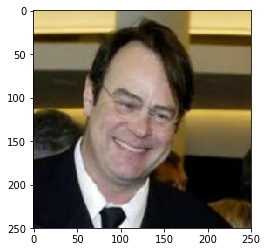

Data and model to GPU
Hello Human!
You look like  American foxhound


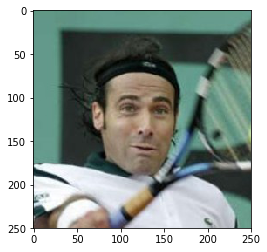

Data and model to GPU
Hello Human!
You look like  American water spaniel


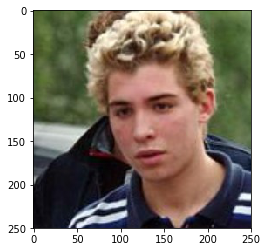

Data and model to GPU
Hello dog!,
Your predicted breed is..
Mastiff


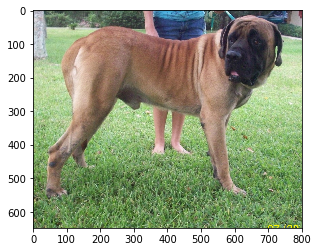

Data and model to GPU
Hello dog!,
Your predicted breed is..
Mastiff


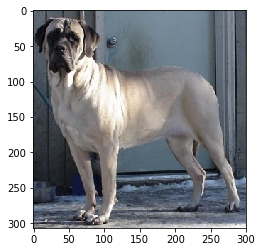

Data and model to GPU
Hello dog!,
Your predicted breed is..
Mastiff


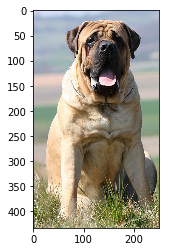

In [76]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

In [33]:
human_files_wild = np.array(glob("human*.jpg"))
dog_files_wild = np.array(glob("dog*.jpg"))

Hello Human!
You look like  Finnish spitz


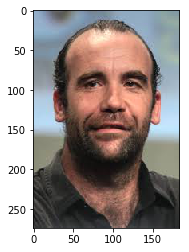

Hello Human!
You look like  Akita


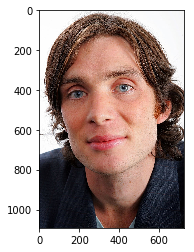

Hello Human!
You look like  Chihuahua


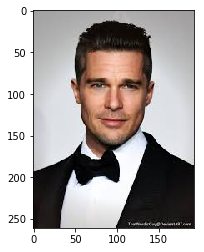

Hello dog!,
Your predicted breed is..
Bulldog


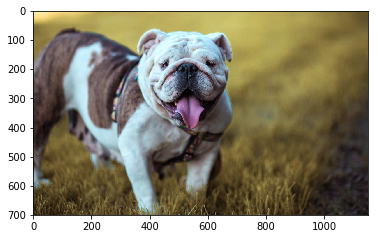

Hello dog!,
Your predicted breed is..
Irish water spaniel


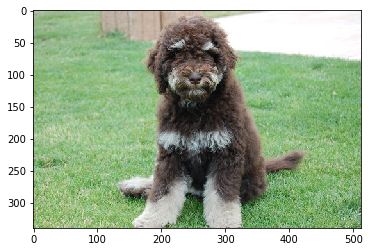

Hello dog!,
Your predicted breed is..
Japanese chin


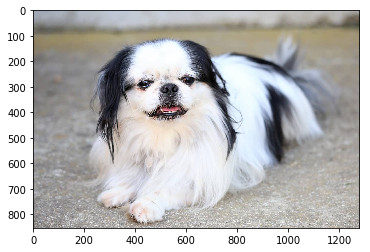

In [34]:
for file in np.hstack((human_files_wild, dog_files_wild)):
    run_app(file)

### Results discussion
1. Barbet was incorrectly identified are Irish water Spaniel both are very similar in color and appearence
2. Bulldog correctly identified
3. Japanese chin was correctly identified
4. Humans were correctly identified